In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_excel('reaLgdp_sample.xlsx')
df.head()

,Year,Colombia_GDP,Panama_GDP
0,1960,3.060624e+10,3.068858e+09
1,1961,3.216386e+10,3.404180e+09
2,1962,3.390454e+10,3.684846e+09
3,1963,3.501888e+10,3.999487e+09
4,1964,3.717847e+10,4.176750e+09


In [3]:
df['Col_growth'] = df['Colombia_GDP'].pct_change()
df['Pan_growth'] = df['Panama_GDP'].pct_change()
df = df.dropna()
df.head()

,Year,Colombia_GDP,Panama_GDP,Col_growth,Pan_growth
1,1961,3.216386e+10,3.404180e+09,0.050892,0.109266
2,1962,3.390454e+10,3.684846e+09,0.054119,0.082447
3,1963,3.501888e+10,3.999487e+09,0.032867,0.085388
4,1964,3.717847e+10,4.176750e+09,0.061669,0.044321
5,1965,3.851690e+10,4.559341e+09,0.036000,0.091600


In [6]:
df['Col_cycle'],df['Col_trend'] = sm.tsa.filters.hpfilter(df['Col_growth'], lamb=1600)
df['Col_trend'].mean()


C:\Users\danie\AppData\Local\Temp\ipykernel_9620\2995954925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Col_cycle'],df['Col_trend'] = sm.tsa.filters.hpfilter(df['Col_growth'], lamb=1600)
C:\Users\danie\AppData\Local\Temp\ipykernel_9620\2995954925.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Col_cycle'],df['Col_trend'] = sm.tsa.filters.hpfilter(df['Col_growth'], lamb=1600)


0.0401249211558919

In [7]:
df['Pan_cycle'],df['Pan_trend'] = sm.tsa.filters.hpfilter(df['Pan_growth'], lamb=1600)
df['Pan_trend'].mean()


C:\Users\danie\AppData\Local\Temp\ipykernel_9620\3018546765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pan_cycle'],df['Pan_trend'] = sm.tsa.filters.hpfilter(df['Pan_growth'], lamb=1600)
C:\Users\danie\AppData\Local\Temp\ipykernel_9620\3018546765.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pan_cycle'],df['Pan_trend'] = sm.tsa.filters.hpfilter(df['Pan_growth'], lamb=1600)


0.05153241121457955

In [8]:
df['Pan_cycle'],df['Pan_trend'] = sm.tsa.filters.hpfilter(df['Panama_GDP'], lamb=1600)
df['Pan_trend'].pct_change().mean()

C:\Users\danie\AppData\Local\Temp\ipykernel_9620\1122930492.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Pan_cycle'],df['Pan_trend'] = sm.tsa.filters.hpfilter(df['Panama_GDP'], lamb=1600)


0.050475111848528514

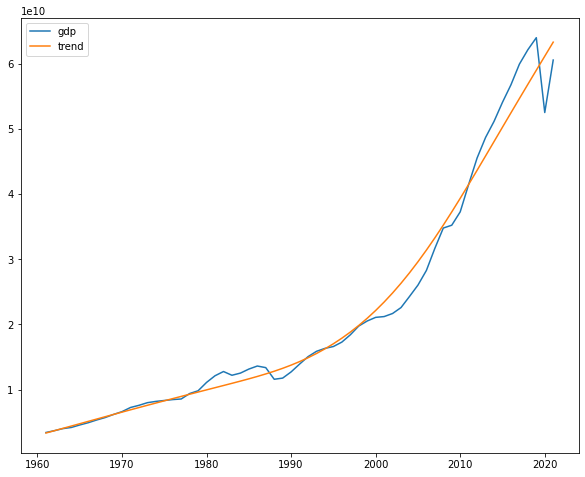

In [9]:
plt.figure(figsize = (10,8))
plt.plot(df['Year'],df['Panama_GDP'], label = 'gdp')
plt.plot(df['Year'],df['Pan_trend'], label = 'trend')
plt.legend()
plt.show()